In [1]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from tqdm import tqdm
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/motion_output.csv")
shorthand_map = {
    "THBT": "This House Believes That",
    "THB": "This House Believes",
    "THW": "This House Would",
    "THS": "This House Supports",
    "THR": "This House Regrets",
    "THO": "This House Opposes",
    "THP": "This House Prefers",
    "TH": "This House"
}

def expand_shorthand(lead):
    for short, full in shorthand_map.items():
        if lead.upper().startswith(short):
            return lead.replace(short, full, 1)
    return lead

df["Lead"] = df["Lead"].astype(str).apply(expand_shorthand)
leads = df["Lead"].astype(str).tolist()

In [3]:
model = SentenceTransformer("all-MiniLM-L12-v2")
X = model.encode(leads)

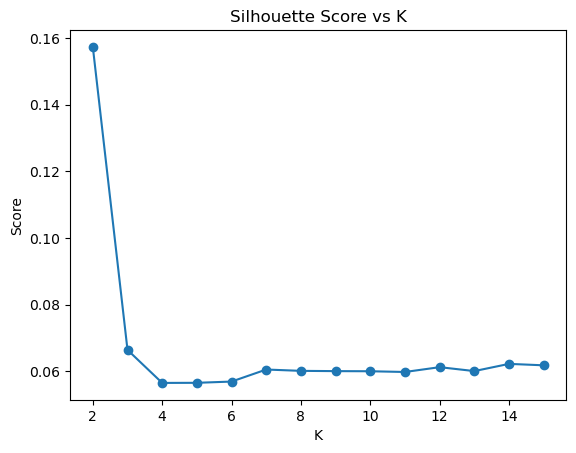

In [4]:
scores = [silhouette_score(X, KMeans(n_clusters=k).fit_predict(X)) for k in range(2, 16)]

plt.plot(range(2, 16), scores, 'o-')
plt.title("Silhouette Score vs K")
plt.xlabel("K")
plt.ylabel("Score")
plt.show()

In [5]:
k = 7
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X)

df["Cluster"] = labels
df.to_csv("../data/motion_clustered.csv", index=False)